In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
#import Path
#import torch
#import torchvision
#import torchvision
#from torchvision import models as models

In [3]:
res = models.resnet152
#hyperparameters
batch_size = 10
epochs = 50
#lr = 0.01 #you can set a specific learning rate or just let it perform cyclic training

#Storing path
save_loc = 'resnet152model_trainedonSIPAKMEDdataset5000' + str(epochs) + "batch" + str(batch_size)

## Declaring path of dataset
path_img = Path("SIPakMed_format_unaugumented")

#Declaring the .pth path for the model weights
weights_path = path_img/'models4'/"resnet152modeltrainedon_DA_HERLEV_SIPAKMED95accuracy"/"resnet152model_trainedonExtendedDAdataset50batch100.001BEST"  #this needs to be of .pth extension

#Model path (.pkl) to the folder with the "export.pkl" seraialization file
model_path = path_img/'models'/"resnet152SimplesipakmedE10B5accuracy87"   #this needs to be of .pkl extension and it needs to have the name "export.pkl"
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)  #the size of the input pictures is quite important
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
#data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']


d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

(5, 5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.742425,0.776472,0.726804,0.723130,04:04
1,1.237812,0.656546,0.824742,0.823194,04:00
2,0.923946,0.661000,0.819588,0.818909,03:56
3,0.705911,0.473963,0.865979,0.865010,03:46
4,0.703835,0.589913,0.860825,0.859767,04:48
5,0.600811,0.511575,0.881443,0.880395,05:44
6,0.730793,0.469765,0.860825,0.860421,04:54
7,0.696886,0.659899,0.814433,0.812770,04:19
8,0.690697,0.539641,0.865979,0.864850,04:06
9,0.571714,0.597474,0.829897,0.830202,03:40


Better model found at epoch 0 with accuracy value: 0.7268041372299194.
Better model found at epoch 1 with accuracy value: 0.8247422575950623.
Better model found at epoch 3 with accuracy value: 0.8659793734550476.
Better model found at epoch 5 with accuracy value: 0.8814433217048645.
Better model found at epoch 19 with accuracy value: 0.8865979313850403.
Better model found at epoch 26 with accuracy value: 0.9123711585998535.
Better model found at epoch 27 with accuracy value: 0.9175257682800293.
Better model found at epoch 29 with accuracy value: 0.938144326210022.
Better model found at epoch 37 with accuracy value: 0.9432989954948425.
Better model found at epoch 41 with accuracy value: 0.9484536051750183.


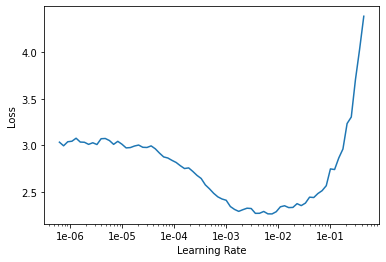

In [4]:

defaults.device = torch.device('cuda')



trans_model= cnn_learner(data, models.resnet152, metrics=[accuracy,FBeta(average="weighted")])


trans_model.unfreeze()


trans_model.lr_find()
trans_model.recorder.plot()

trans_model.fit_one_cycle(epochs,callbacks=[SaveModelCallback(trans_model, every='improvement', mode = 'max', monitor='accuracy', name=save_loc)])

trans_model.save(save_loc)
trans_model.export()